In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#ignore warning
import warnings
warnings.filterwarnings("ignore")

from aquire import get_titanic_data
from prepare import prep_titanic_data

df=prep_titanic_data(get_titanic_data())
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,embarked_encode
0,0,0,3,male,22.0,1,0,7.2500,S,Third,Southampton,0,3
1,1,1,1,female,38.0,1,0,71.2833,C,First,Cherbourg,0,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,Southampton,1,3
3,3,1,1,female,35.0,1,0,53.1000,S,First,Southampton,0,3
4,4,0,3,male,35.0,0,0,8.0500,S,Third,Southampton,1,3


In [3]:
# Handle missing values in the `age` column.
df.dropna(inplace=True)

In [4]:
X = df[['pclass','age','fare','sibsp','parch']]
y = df[['survived']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

X_train.head()

,pclass,age,fare,sibsp,parch
60,3,22.0,7.2292,0,0
348,3,3.0,15.9000,1,1
606,3,30.0,7.8958,0,0
195,1,58.0,146.5208,0,0
56,2,21.0,10.5000,0,0


In [5]:
# from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(C=1, class_weight={1:2}, random_state = 123, solver='saga')

In [6]:
logit.fit(X_train, y_train)

LogisticRegression(C=1, class_weight={1: 2}, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=123, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

In [7]:
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[-0.03183343 -0.00819677  0.01882492 -0.02030296  0.01317287]]
Intercept: 
 [0.00230414]


In [8]:
y_pred = logit.predict(X_train)

In [11]:
y_pred_proba = logit.predict_proba(X_train)

In [15]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.65


In [16]:
print(confusion_matrix(y_train, y_pred))

[[181 112]
 [ 64 142]]


In [17]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.62      0.67       293
           1       0.56      0.69      0.62       206

   micro avg       0.65      0.65      0.65       499
   macro avg       0.65      0.65      0.65       499
weighted avg       0.66      0.65      0.65       499



In [10]:
print('Accuracy of Logistic Regression classifier on test set: {:.2f}'
     .format(logit.score(X_test, y_test)))

Accuracy of Logistic Regression classifier on test set: 0.68


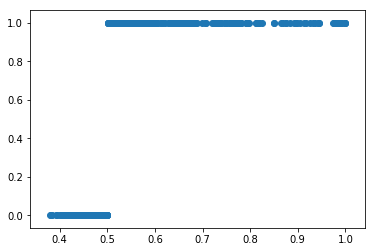

In [13]:
## verify
y_pred_proba = [i[1] for i in y_pred_proba]
fig = plt.figure()
ax = fig.add_subplot(111)#why are we using subplot since there is only one plot?
ax.scatter(y_pred_proba, y_pred)

### Decision Tree Model

In [39]:
from pydataset import data
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
df1=data('iris')
df1.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [18]:
df1.columns = [col.lower().replace('.', '_') for col in df1]

In [19]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [20]:
X = df1.drop(['species'],axis=1)
y = df1[['species']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
115,5.8,2.8,5.1,2.4
137,6.3,3.4,5.6,2.4
54,5.5,2.3,4.0,1.3
20,5.1,3.8,1.5,0.3
39,4.4,3.0,1.3,0.2


In [21]:
# for classification you can change the algorithm to gini or entropy (information gain).  Default is gini.
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=123)

In [22]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')

In [23]:
y_pred=clf.predict(X_train)
y_pred[0:5]

array(['virginica', 'virginica', 'versicolor', 'setosa', 'setosa'],
      dtype=object)

In [25]:
y_pred_proba=clf.predict_proba(X_train)
y_pred_proba

array([[0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.975, 0.025],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.975, 0.025],
       [0.   , 0.975, 0.025],
       [0.   , 0.975, 0.025],
       [0.   , 0.975, 0.025],
       [0.   , 0.   , 1.   ],
       [0.   , 0.975, 0.025],
       [0.   , 0.   , 1.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.975, 0.025],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.975, 0.025],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.975, 0.025],
       [0.   , 0.975, 0.025],
       [0.   , 0.   , 1.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.975, 0.025],
       [0.   , 0.975, 0.025],
       [1.   , 0.   , 0.   ],
       [0.

In [26]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.98


In [27]:
confusion_matrix(y_train, y_pred)

array([[32,  0,  0],
       [ 0, 40,  0],
       [ 0,  2, 31]])

In [28]:
sorted(y_train.species.unique())

['setosa', 'versicolor', 'virginica']

In [29]:
y_train.species.value_counts()

versicolor    40
virginica     33
setosa        32
Name: species, dtype: int64

In [31]:
labels = sorted(y_train.species.unique())
import pandas as pd
pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

,setosa,versicolor,virginica
setosa,32,0,0
versicolor,0,40,0
virginica,0,2,31


In [32]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        32
  versicolor       0.95      1.00      0.98        40
   virginica       1.00      0.94      0.97        33

   micro avg       0.98      0.98      0.98       105
   macro avg       0.98      0.98      0.98       105
weighted avg       0.98      0.98      0.98       105



In [33]:
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on test set: 0.93


In [41]:
## need to install graphviz to anaconda
## example: 

from sklearn.datasets import load_iris

iris = load_iris()
clf = DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

import graphviz

from graphviz import Graph

dot_data = export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 

graph.render('iris_decision_tree', view=True)

'iris_decision_tree.pdf'

### Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
X=df[['pclass','age','fare','sibsp','parch']]
y=df.survived
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=123)
X_train.head()

,pclass,age,fare,sibsp,parch
60,3,22.0,7.2292,0,0
348,3,3.0,15.9000,1,1
606,3,30.0,7.8958,0,0
195,1,58.0,146.5208,0,0
56,2,21.0,10.5000,0,0


In [46]:
rf=RandomForestClassifier(bootstrap=True,class_weight=None,
                          criterion='gini',min_samples_leaf=3
                          ,n_estimators=100,
                          max_depth=3,random_state=123)

In [47]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [48]:
print(rf.feature_importances_)

[0.32480013 0.13752631 0.37630011 0.07262912 0.08874434]


In [49]:
y_pred = rf.predict(X_train)

In [50]:
y_pred_proba = rf.predict_proba(X_train)

In [51]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.75


In [52]:
print(confusion_matrix(y_train, y_pred))

[[248  45]
 [ 79 127]]


In [53]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       293
           1       0.74      0.62      0.67       206

   micro avg       0.75      0.75      0.75       499
   macro avg       0.75      0.73      0.74       499
weighted avg       0.75      0.75      0.75       499



In [54]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

Accuracy of random forest classifier on test set: 0.74


### KNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
knn=KNeighborsClassifier(n_neighbors=5,weights='uniform')

In [58]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [59]:
y_pred=knn.predict(X_train)

In [60]:
y_pred_proba=knn.predict_proba(X_train)

In [61]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.76


In [62]:
print(confusion_matrix(y_train, y_pred))

[[239  54]
 [ 65 141]]


In [63]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       293
           1       0.72      0.68      0.70       206

   micro avg       0.76      0.76      0.76       499
   macro avg       0.75      0.75      0.75       499
weighted avg       0.76      0.76      0.76       499



In [64]:
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of KNN classifier on test set: 0.67


([<matplotlib.axis.XTick at 0x1a27086c50>,
 <a list of 5 Text xticklabel objects>)

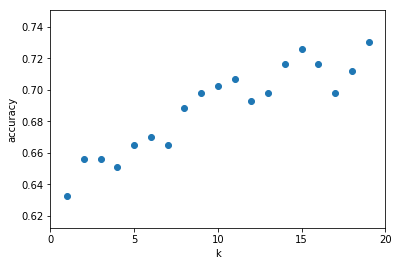

In [65]:
import matplotlib.pyplot as plt
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

In [66]:
%store knn

Stored 'knn' (KNeighborsClassifier)


### SVM

In [67]:
from sklearn.svm import SVC

In [70]:
df1=sns.load_dataset('iris')

In [71]:
X = df1.drop(['species'],axis=1)
y = df1[['species']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [74]:
svm = SVC(probability = True, random_state = 123)
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=123,
  shrinking=True, tol=0.001, verbose=False)

In [75]:
y_pred = svm.predict(X_train)

In [76]:
y_pred_proba = svm.predict_proba(X_train)
y_pred_proba[0:10]

array([[0.01428155, 0.01439904, 0.97131941],
       [0.0163127 , 0.00985372, 0.97383358],
       [0.00757722, 0.95064107, 0.04178171],
       [0.95145722, 0.02451949, 0.02402328],
       [0.94195462, 0.02745419, 0.03059119],
       [0.01615358, 0.17168914, 0.81215728],
       [0.93045699, 0.04387476, 0.02566825],
       [0.94782817, 0.0276442 , 0.02452763],
       [0.01337596, 0.93357643, 0.05304762],
       [0.00980796, 0.94920915, 0.04098289]])

In [77]:
print('Accuracy of SVM classifier on training set: {:.2f}'
      .format(svm.score(X_train, y_train)))

Accuracy of SVM classifier on training set: 0.98


In [78]:
print(confusion_matrix(y_train, y_pred))

[[32  0  0]
 [ 0 39  1]
 [ 0  1 32]]


In [79]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        32
  versicolor       0.97      0.97      0.97        40
   virginica       0.97      0.97      0.97        33

   micro avg       0.98      0.98      0.98       105
   macro avg       0.98      0.98      0.98       105
weighted avg       0.98      0.98      0.98       105



In [80]:
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on test set: 0.98


In [81]:
%store svm

Stored 'svm' (SVC)


In [85]:
from itertools import product
from sklearn.ensemble import VotingClassifier
from sklearn import datasets

In [88]:
iris=datasets.load_iris()

In [90]:
type(iris)

sklearn.utils.Bunch

In [91]:
X = iris.data[:,[1, 3]]
y = iris.target

In [92]:
X[0:5]

array([[3.5, 0.2],
       [3. , 0.2],
       [3.2, 0.2],
       [3.1, 0.2],
       [3.6, 0.2]])

In [93]:
np.unique(y)

array([0, 1, 2])

In [94]:
# training classifiers
clf1=DecisionTreeClassifier(max_depth=4)
clf2=KNeighborsClassifier(n_neighbors=7)
clf3=SVC(gamma=.1,kernel='rbf',probability=True)
eclf=VotingClassifier(estimators=[('dt',clf1),('knn',clf2),('svc',clf3)],voting='soft',weights=[2,1,2])

In [95]:
clf1.fit(X,y)
clf2.fit(X,y)
clf3.fit(X,y)
eclf.fit(X,y)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0....',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='soft',
         weights=[2, 1, 2])

In [96]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf1.score(X, y)))

print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(clf2.score(X, y)))

print('Accuracy of SVC classifier on training set: {:.2f}'
     .format(clf3.score(X, y)))

print('Accuracy of a Voting Classifier using clf1, clf2, and clf3 on training set: {:.2f}'
     .format(eclf.score(X, y)))

Accuracy of Decision Tree classifier on training set: 0.97
Accuracy of KNN classifier on training set: 0.95
Accuracy of SVC classifier on training set: 0.96
Accuracy of a Voting Classifier using clf1, clf2, and clf3 on training set: 0.97


In [97]:
xvalues = np.array([0, 1, 2, 3, 4]);
yvalues = np.array([0, 1, 2, 3, 4]);

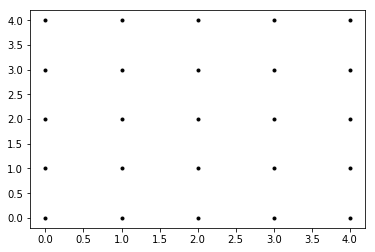

In [98]:
xx, yy = np.meshgrid(xvalues, yvalues)

plt.plot(xx, yy, marker='.', color='k', linestyle='none')

In [99]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1

In [101]:
x_min,x_max

(1.0, 5.4)

In [102]:
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

In [103]:
y_min,y_max

(-0.9, 3.5)

In [104]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

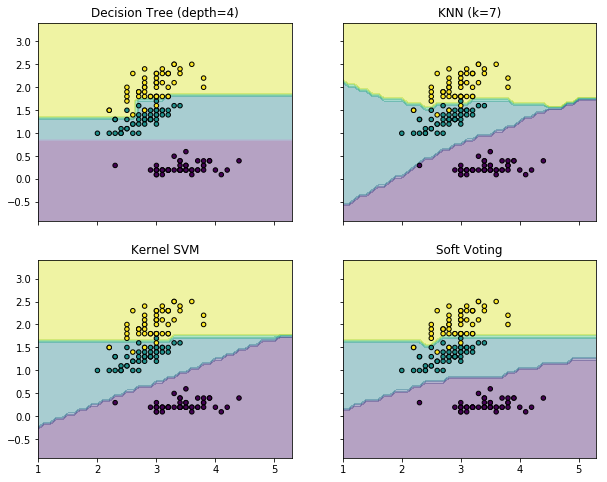

In [105]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, eclf],
                        ['Decision Tree (depth=4)', 'KNN (k=7)',
                         'Kernel SVM', 'Soft Voting']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()